In [160]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [161]:
data = pd.read_csv("spiral.csv")
inputs = data.drop(columns=["Label"])
test = data.Label

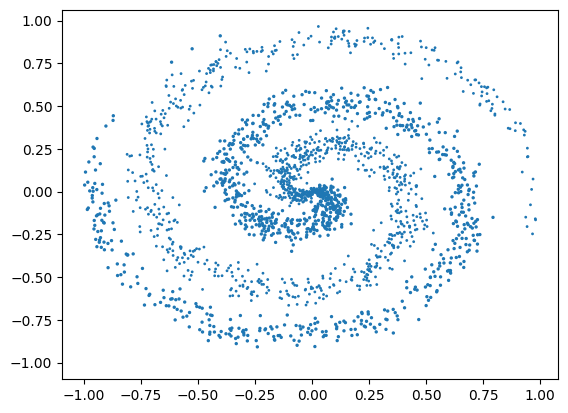

In [162]:
plt.scatter(inputs.x,inputs.y,test)

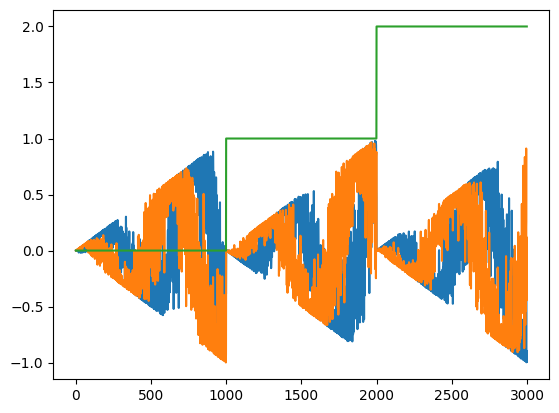

In [163]:
plt.plot(inputs)
plt.plot(test)

In [164]:
inputs.shape
test.shape

(2999,)

In [178]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(2,)),
    tf.keras.layers.Dense(200,activation="leaky_relu"),
    tf.keras.layers.Dense(200,activation="leaky_relu"),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Dense(200,activation="leaky_relu"),
    tf.keras.layers.Dense(3,activation="leaky_relu"),
    tf.keras.layers.Softmax()
])

c:\Users\anomi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Input 0 of layer "bidirectional" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 200)

In [179]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy,
    metrics = ['accuracy']
)
model.fit(inputs,test,epochs = 200)

Epoch 1/200


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8910 - loss: 0.2487
Epoch 2/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9033 - loss: 0.2236
Epoch 3/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8991 - loss: 0.2272
Epoch 4/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9198 - loss: 0.1993
Epoch 5/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9093 - loss: 0.2220
Epoch 6/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9042 - loss: 0.2333
Epoch 7/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9110 - loss: 0.2105
Epoch 8/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9144 - loss: 0.2080
Epoch 9/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9011 - loss: 0.2343
Epoch 10/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9067 - loss: 0.2250
Epoch 11/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8968 - loss: 0.2316
Epoch 12/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9045 - lo

In [180]:
prediction = model.predict(inputs)
def maxer(ls):
    maxi = 0
    maxval = -1
    for i in range(len(ls)):
        if(ls[i]>maxval):
            maxval = ls[i]
            maxi = i
    return maxi
predictor = []
for i in prediction:
    predictor.append(maxer(i))

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [181]:
accuracy = 0
ls = []
for i, j in zip(predictor,test):
    ls.append([i,j])
    if(i == j):
        accuracy+=1

print("Accuracy founded: ",100*accuracy/len(test),"%")

Accuracy founded:  92.19739913304434 %


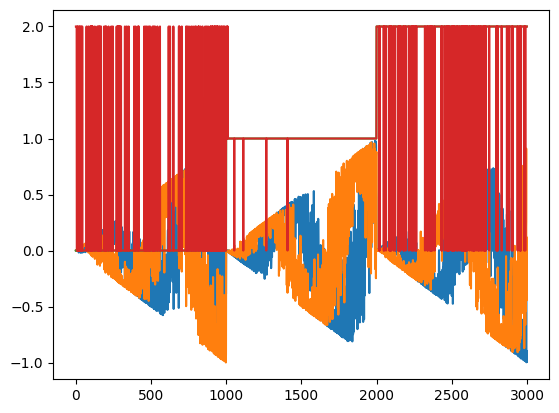

In [182]:
plt.plot(inputs)
plt.plot(test)
plt.plot(predictor)

In [183]:
import pandas_datareader as web
import datetime as dt
data = web.DataReader('FB','yahoo',dt.datetime(2012,1,1),dt.datetime(2020,1,1))

AttributeError: 'NoneType' object has no attribute 'group'